In [1]:
import pandas as pd
import matplotlib.pyplot as plt

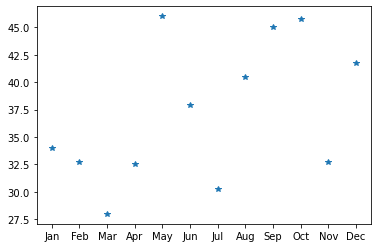

In [2]:
import numpy as np
x=pd.read_csv("C:/Users/Shairra/Weather2020.csv")
y=pd.read_csv("C:/Users/Shairra/Weather2020.csv")

y1=list(x["Months"])
x1=list(x["second"])
z1=list(x["19"])
w1=list(x["18"])

plt.plot(y1, x1,'*')
plt.show()

In [3]:
flood=[] #0-no flood 1-there is flood
d19=[] #day 19 weather
diff=[] #difference of day 18 and day 19

#Creating a new column with binary classification depending if that group of 10 days in a month had flooded or not,
#using the 2020 weather of Davao as threshold
for i in range(0,len(x1)):
    if x1[i]>=45:
        flood.append('1')
    else:
        flood.append('0')

#Approaximately finding the weather data for Day 19
for k in range(0,len(x1)):
    d19.append(z1[k]/3)

#Finding the increase in weather from Day 18 to Day 19
for k in range(0,len(x1)):
    diff.append(abs(w1[k]-z1[k]))

df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'Day19':d19})

x["avgd19"]=d19
x["diff"]=diff
x["flood"]=flood

#Saving the New CSV file with the new columns
x.to_csv("Weather2020WithNewColumns.csv")
print((x))

    Place Months     1         2      3     4     5     6     7     8  ...  \
0   Davao    Jan  3.50  5.500000  5.500  3.00  3.25  5.00  5.25  3.75  ...   
1   Davao    Feb  2.00  4.000000  2.750  2.75  2.25  3.75  5.50  3.75  ...   
2   Davao    Mar  4.50  4.750000  3.000  2.75  4.25  4.25  3.75  3.75  ...   
3   Davao    Apr  4.25  3.250000  2.667  2.75  2.25  2.75  2.75  3.75  ...   
4   Davao    May  4.50  5.000000  5.000  2.75  2.50  3.00  2.00  4.00  ...   
5   Davao    Jun  2.75  4.750000  6.750  5.00  3.75  5.75  6.75  5.25  ...   
6   Davao    Jul  7.50  4.333333  3.500  3.00  3.00  3.75  4.50  3.25  ...   
7   Davao    Aug  4.25  4.500000  4.500  5.25  4.25  5.00  5.50  5.00  ...   
8   Davao    Sep  3.50  3.750000  2.500  2.25  3.50  2.75  4.50  2.25  ...   
9   Davao    Oct  4.00  5.000000  4.000  3.50  3.25  5.75  6.00  5.00  ...   
10  Davao    Nov  4.50  4.250000  3.250  2.75  3.75  4.50  2.75  3.25  ...   
11  Davao    Dec  4.50  4.500000  4.250  6.00  4.00  5.00  5.50 

In [4]:
#Logistic Regression

In [5]:
import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:
#Taking the columns which will be used for training the model
#35 - Third group of 10 days in a month
#36 - Average of Day 19
#37 - Difference of weather from Day 18 to Day 19
#38 - Binary class of flood- 0 OR 1

#We use Logistic Regression for training

#For columns 35-37 - Third group of 10 days in a month, Average of Day 19, and Difference of weather from Day 18 to Day 19
X = x.iloc[:,35:38]
#For column 38 - Binary class of flood- 0 OR 1
y1= x.iloc[:,38]

#print(X)
#print(y1)

(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)

Lr=LogisticRegression()

Lr.fit(X,y1)
print("Accuracy : ", Lr.score(X,y1))  # Print Accuracy

Accuracy :  0.9166666666666666


In [7]:
q1=1.25 #january 8-9 2021 weather data on average
w1=43.5 #average weather in past 10 days of january
e1=1.75 #average increase in weather from january 9 to 10 2021

q2=1 #january 15-16 2021 weather data on average
w2=53 #average weather in past 10 days of january
e2=3 #average increase in weather from january 16 to 17 2021

#q3=0.5 #sample weather data on average
#w3=20 #sample average weather
#e3=3 #sample average increase in weather

l=[[q1,w1,e1],[q2,w2,e2]]

f1=Lr.predict(l)

for i in range(len(f1)):

    if (int(f1[i])==1):
        print(f1[i],"- possibility of severe flood")
    else:
        print(f1[i],"- no chance of severe flood")

0 - no chance of severe flood
1 - possibility of severe flood


In [8]:
#KNN Classifier

In [9]:
from sklearn import model_selection,neighbors

# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[0.47435897, 0.16666667, 0.23076923],
       [0.1025641 , 0.5       , 0.61538462],
       [0.3974359 , 0.11111111, 0.53846154],
       [0.        , 0.5       , 0.53846154],
       [0.51282051, 1.        , 1.        ],
       [0.15384615, 0.        , 0.76923077],
       [0.81196581, 0.27777778, 0.30769231],
       [0.65384615, 0.5       , 0.38461538],
       [0.66666667, 0.16666667, 0.46153846],
       [1.        , 0.66666667, 0.15384615],
       [0.16666667, 0.16666667, 0.        ],
       [0.67948718, 0.55555556, 0.30769231]])

In [10]:
clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)

KNeighborsClassifier()

In [11]:
# Predicted chance of Flood.
print("Predicted Values for the Floods:")
Y_predict=clf.predict(X_test)
Y_predict

Predicted Values for the Floods:


array(['0', '0', '0'], dtype=object)

In [12]:
print("Actual Values for the Floods:")
print(Y_test)

Actual Values for the Floods:
6     0
11    0
4     1
Name: flood, dtype: object


In [13]:
#Scaling the dataset.
from sklearn.model_selection import cross_val_score,cross_val_predict
X_train_std= minmax.fit_transform(X_train)
X_test_std= minmax.fit_transform(X_test)
knn_acc=cross_val_score(clf,X_train_std,Y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,X_train_std,Y_train,cv=3,method='predict_proba')

C:\Users\Shairra\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Shairra\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [14]:
from sklearn.metrics import accuracy_score
print("\nAccuracy Score:%f"%(accuracy_score(Y_test,Y_predict)*100))


Accuracy Score:66.666667
